In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("all_stock_data.csv")
df.head()

,Date,Ticker,Open,High,Low,Close,Volume
0,2023-10-02,AAPL,169.974219,173.031811,169.686320,172.485809,52164500
1,2023-10-03,AAPL,171.006634,172.366676,169.577124,171.145615,49594600
2,2023-10-04,AAPL,169.845131,172.942440,169.726009,172.396439,53020300
3,2023-10-05,AAPL,172.525514,174.173439,171.423589,173.637375,48527900
4,2023-10-06,AAPL,172.535439,176.694955,171.919940,176.198593,57224100


In [2]:
df.columns

Index(['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [3]:
df.isnull().sum()

Date      0
Ticker    0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

### Important liabraries

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 3.2244979872980957
R2 Score: 0.9998070037257372


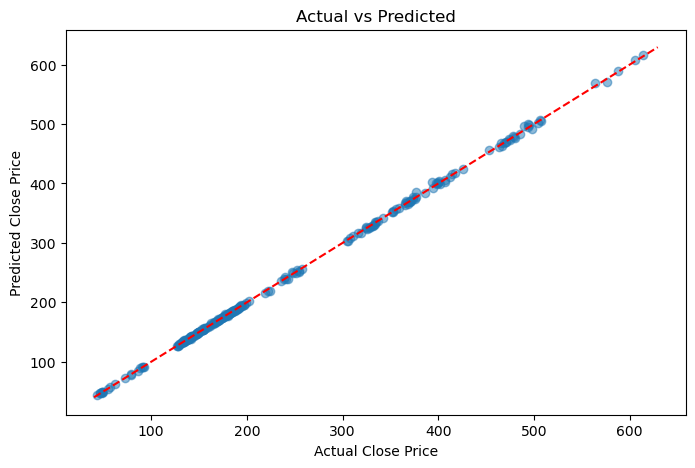

In [11]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [13]:
df['Price_Up'] = (df['Close'] > df['Open']).astype(int)

In [14]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Price_Up']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [18]:
y_pred = model.predict(X_test)

In [21]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5766129032258065


In [23]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[  0 105]
 [  0 143]]
